In [ ]:
# CODSOFT TASK-3 CREDIT CARD FRAUD DETECTION

In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


C:\Users\HP\AppData\Local\Temp\ipykernel_17300\1027741957.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,7.092545e-13,1.874948e-12,1.053347e-12,7.127611e-13,-1.474791e-13,-5.231558e-13,-2.282250e-13,-6.425436e-13,4.950748e-13,7.057397e-13,1.766111e-12,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.shape

(284807, 31)

In [6]:
# percentage of missing values in each column
round(100 * (df.isnull().sum()/len(df)),2).sort_values(ascending=False)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

In [7]:
# percentage of missing values in each row
round(100 * (df.isnull().sum(axis=1)/len(df)),2).sort_values(ascending=True)

0         0.0
189861    0.0
189862    0.0
189863    0.0
189864    0.0
         ... 
94933     0.0
94932     0.0
94931     0.0
94937     0.0
284806    0.0
Length: 284807, dtype: float64

In [8]:
# Duplicate Check
card_d=df.copy()
card_d.drop_duplicates(subset=None, inplace=True)

In [9]:
card_d.shape

(283726, 31)

In [10]:
#Assigning removed duplicate datase to original 
card=card_d
card.shape

(283726, 31)

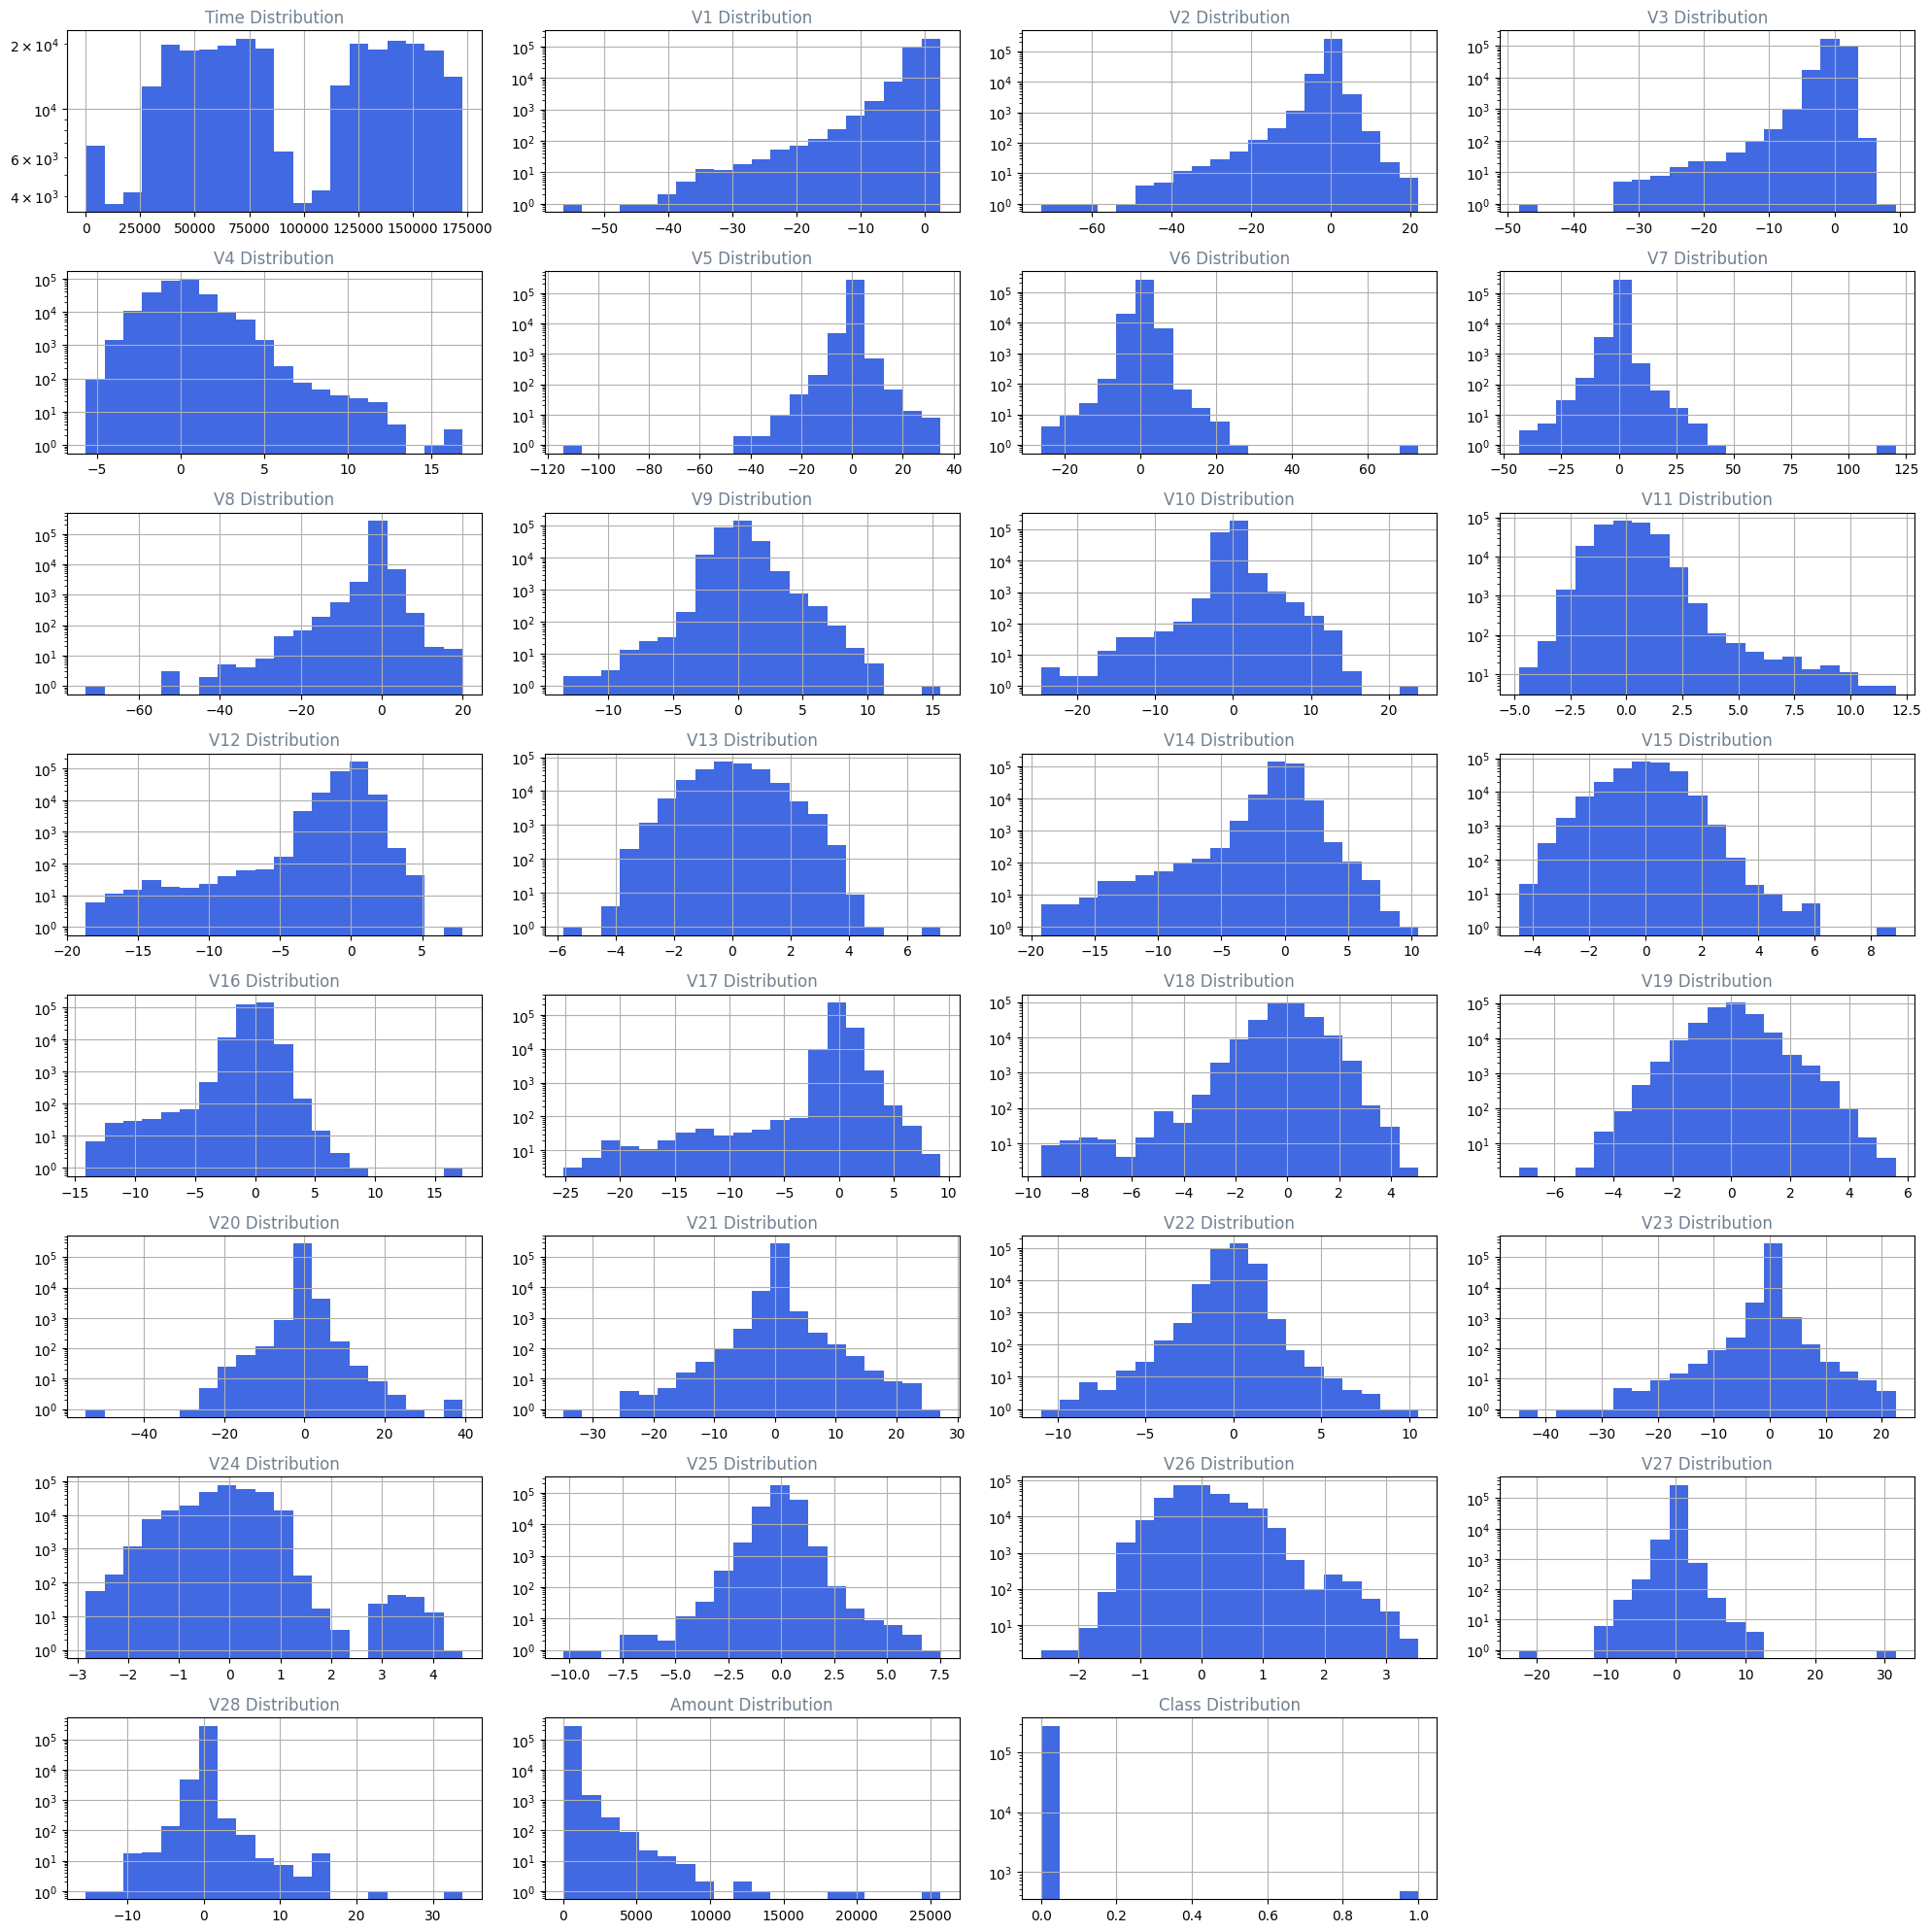

In [11]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='RoyalBlue')
        ax.set_title(feature+" Distribution",color='SlateGray')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(card,card.columns,8,4)

In [12]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

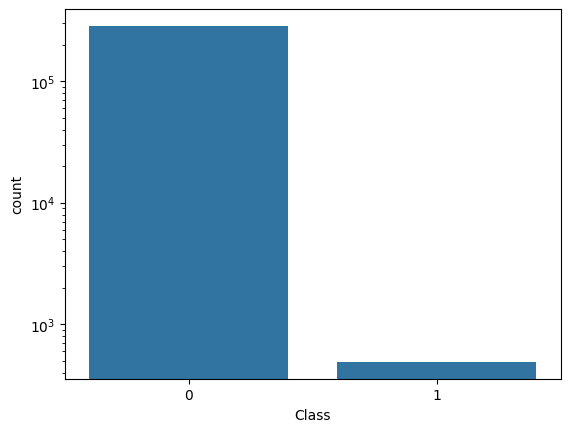

In [13]:
ax=sns.countplot(x='Class',data=df);
ax.set_yscale('log')

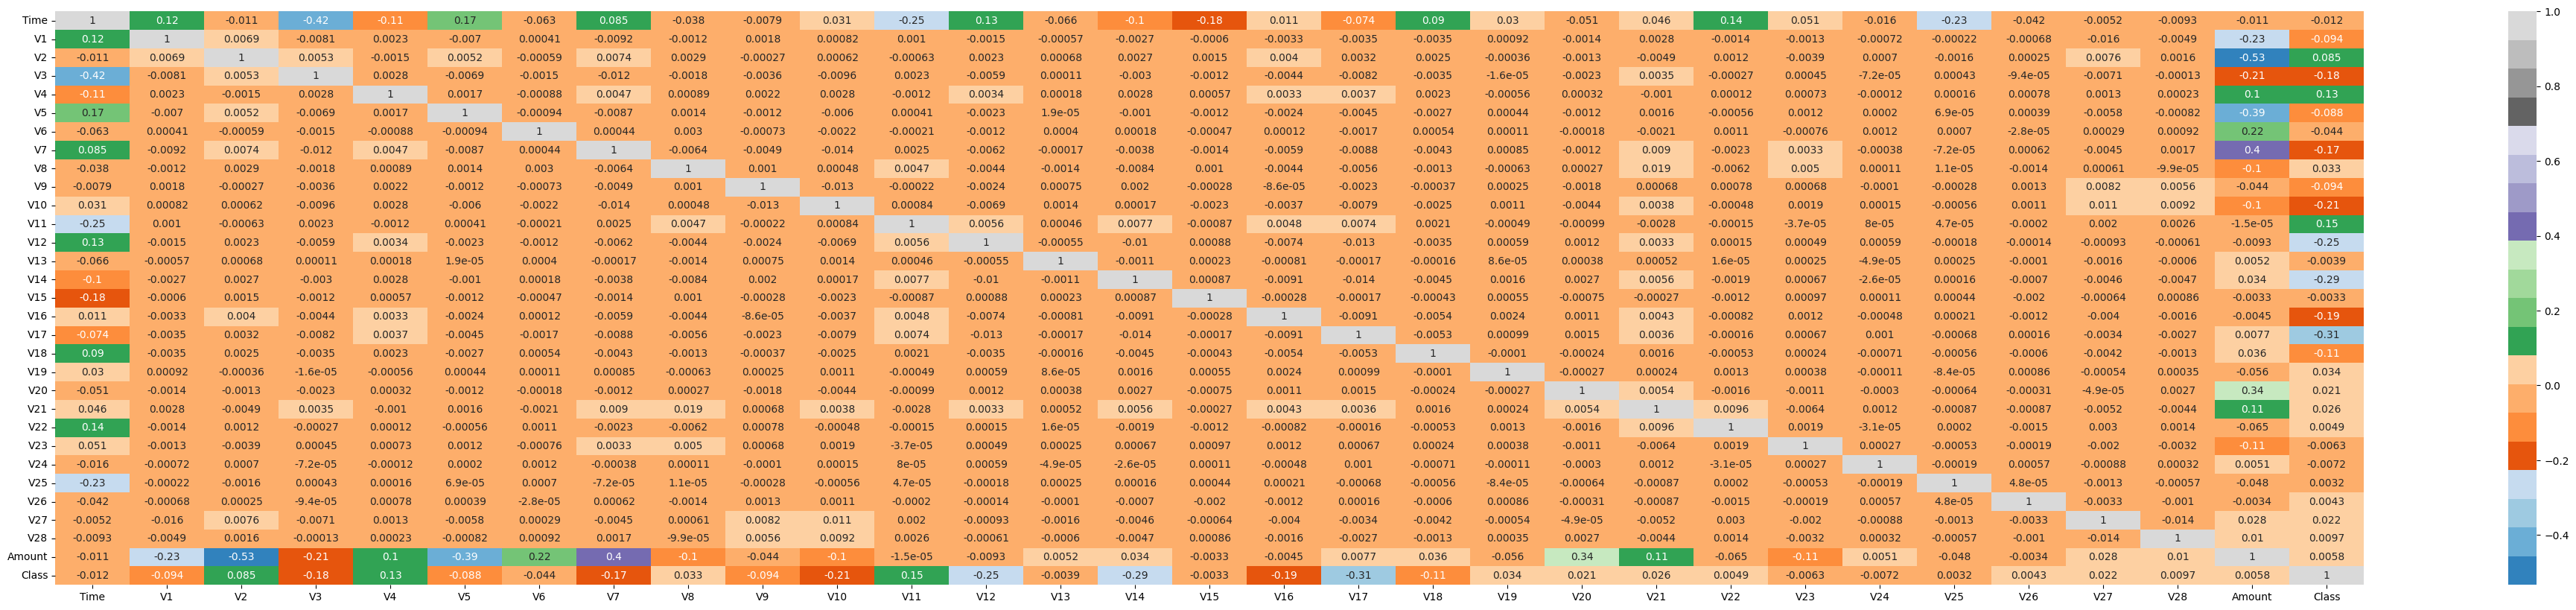

In [14]:
plt.figure(figsize = (50,10))
sns.heatmap(card.corr(), annot = True, cmap="tab20c")
plt.show()

In [15]:
#Logistic Regression¶
card.shape

(283726, 31)

In [16]:
#Dropping Time as it's non business required data
estimators=[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
X1 = df[estimators]
y = df['Class']

In [17]:
col=X1.columns[:-1]
col


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [18]:
X = sm.add_constant(X1)
reg_logit = sm.Logit(y,X)
results_logit = reg_logit.fit()

Optimization terminated successfully.
         Current function value: 0.003919
         Iterations 13


In [19]:
results_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               284807
Model:                          Logit   Df Residuals:                   284777
Method:                           MLE   Df Model:                           29
Date:                Tue, 04 Jun 2024   Pseudo R-squ.:                  0.6918
Time:                        10:45:43   Log-Likelihood:                -1116.1
converged:                       True   LL-Null:                       -3621.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7304      0.151    -57.654      0.000      -9.027      -8.434
V1             0.0837      0.042      2.016      0.044       0.002       0.165
V2             0.0130      0.058      0.226      0.822      -0.100       0.126
V3             0.0384      0.045      0.845      0.398      -0.051       0.128
V4             0.7059      0.074      9.578      0.000       0.561       0.850
V5             0.1020      0.065      1.559      0.119      -0.026       0.230
V6            -0.1229      0.076     -1.621      0.105      -0.271       0.026
V7            -0.1107      0.066     -1.674      0.094      -0.240       0.019
V8            -0.1683      0.031     -5.511      0.000      -0.228      -0.108
V9            -0.2609      0.110     -2.375      0.018      -0.476      -0.046
V10           -0.8188      0.097     -8.439      0.000      -1.009      -0.629
V11           -0.0123      0.076     -0.162      0.871      -0.161       0.137
V12            0.0693      0.086      0.805      0.421      -0.099       0.238
V13           -0.3200      0.081     -3.937      0.000      -0.479      -0.161
V14           -0.5451      0.062     -8.843      0.000      -0.666      -0.424
V15           -0.0853      0.084     -1.016      0.310      -0.250       0.079
V16           -0.1936      0.125     -1.551      0.121      -0.438       0.051
V17            0.0024      0.069      0.035      0.972      -0.132       0.137
V18           -0.0373      0.128     -0.292      0.770      -0.287       0.213
V19            0.0764      0.096      0.797      0.425      -0.111       0.264
V20           -0.4473      0.082     -5.488      0.000      -0.607      -0.288
V21            0.3675      0.058      6.334      0.000       0.254       0.481
V22            0.5787      0.128      4.514      0.000       0.327       0.830
V23           -0.0901      0.057     -1.568      0.117      -0.203       0.023
V24            0.1384      0.149      0.928      0.353      -0.154       0.431
V25           -0.0449      0.129     -0.349      0.727      -0.297       0.207
V26           -0.0034      0.189     -0.018      0.986      -0.374       0.368
V27           -0.8052      0.123     -6.568      0.000      -1.045      -0.565
V28           -0.2943      0.089     -3.295      0.001      -0.469      -0.119
Amount         0.0009      0.000      2.458      0.014       0.000       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [20]:
def back_feature_elem (data_frame,dep_var,col_list):
    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.0001):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(X,df.Class,col)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
C:\Users\HP\AppData\Local\Temp\ipykernel_17300\2416835357.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if largest_pvalue[0]<(0.0001):


In [21]:
result.summary()

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               284807
Model:                          Logit   Df Residuals:                   284779
Method:                           MLE   Df Model:                           27
Date:                Tue, 04 Jun 2024   Pseudo R-squ.:                    -inf
Time:                        10:46:53   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                       -3621.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V1            -3.8218      0.012   -314.141      0.000      -3.846      -3.798
V2             3.7765      0.012    309.690      0.000       3.753       3.800
V3            -8.5012      0.027   -318.673      0.000      -8.554      -8.449
V4             5.0093      0.016    312.841      0.000       4.978       5.041
V5            -5.8684      0.019   -313.694      0.000      -5.905      -5.832
V6            -2.0052      0.007   -271.662      0.000      -2.020      -1.991
V7           -11.0611      0.035   -318.170      0.000     -11.129     -10.993
V8             2.6385      0.009    284.203      0.000       2.620       2.657
V9            -5.4523      0.018   -309.421      0.000      -5.487      -5.418
V10          -12.6449      0.040   -318.589      0.000     -12.723     -12.567
V11            8.8430      0.028    315.792      0.000       8.788       8.898
V12          -15.9414      0.050   -319.225      0.000     -16.039     -15.844
V13            0.1941      0.005     37.623      0.000       0.184       0.204
V14          -16.4849      0.052   -319.253      0.000     -16.586     -16.384
V15           -0.3583      0.006    -62.870      0.000      -0.370      -0.347
V16          -14.9991      0.047   -318.332      0.000     -15.091     -14.907
V17          -27.2029      0.085   -320.058      0.000     -27.369     -27.036
V18          -10.1248      0.032   -315.045      0.000     -10.188     -10.062
V19            3.2932      0.012    273.533      0.000       3.270       3.317
V20            1.9872      0.009    210.731      0.000       1.969       2.006
V21            2.2782      0.010    231.542      0.000       2.259       2.297
V22            0.1845      0.007     25.923      0.000       0.171       0.198
V23           -0.1989      0.009    -21.774      0.000      -0.217      -0.181
V24           -0.1585      0.008    -18.771      0.000      -0.175      -0.142
V25            0.6190      0.010     59.316      0.000       0.598       0.639
V26            0.2025      0.011     18.946      0.000       0.182       0.223
V27            2.5278      0.016    158.026      0.000       2.496       2.559
V28            1.1526      0.015     74.650      0.000       1.122       1.183
==============================================================================
"""

In [22]:
# checking the balance of the dataset 
fraud_count = card["Class"].value_counts()
fraud_rate = 100*fraud_count/card.shape[0]
fraud_data = pd.concat([fraud_count, fraud_rate], axis=1).reset_index()
fraud_data.columns = ['Class',' Count','Percentage']
fraud_data

,Class,Count,Percentage
0,0,283253,99.83329
1,1,473,0.16671


In [23]:
# Preparation
# handling imbalance
df_fraud = df[df['Class']==1]
df_not_fraud = df[df[ 'Class']==0]
df_not_fraud_sampled =df_not_fraud.sample(df_fraud.shape[0], replace=False, random_state=101)
df_balanced = pd.concat([df_not_fraud_sampled, df_fraud], axis=0).sample(frac=1, replace=False, random_state=101).reset_index().drop('index', axis=1)

In [24]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(df_balanced.drop('Class', axis=1), df_balanced['Class'], test_size = 0.2, random_state=101)

print(f'''x_train: {x_train.shape} 
x_test: {x_test.shape}
y_train: {y_train.shape} 
y_test: (y_test.shape)''')

x_train: (787, 30) 
x_test: (197, 30)
y_train: (787,) 
y_test: (y_test.shape)


In [25]:
# Fitting a Random Forest Model
# logistic model pipe
randomForestModel= Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', RandomForestClassifier())
])
randomForestModel.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [26]:
new_features=card[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V20','V21', 'V22', 'V23', 'V25', 'V26', 'V27','Class']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,stratify=y,random_state=100)

In [27]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [28]:
# Model accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.58      0.70        95

    accuracy                           1.00     56746
   macro avg       0.94      0.79      0.85     56746
weighted avg       1.00      1.00      1.00     56746



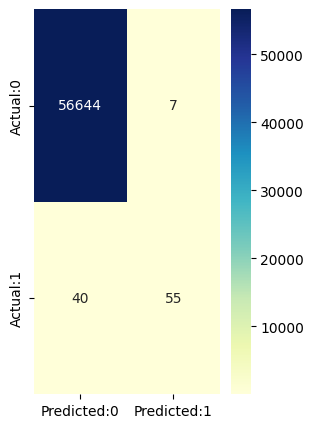

In [29]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (3,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [30]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [31]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',
'The Missclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',
'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',
'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n',
'Positive Predictive value = TP/(TP+FP) =               ',TP/float(TP+FP),'\n',
'Negative predictive Value = TN/(TN+FN) =               ',TN/float(TN+FN),'\n',
'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',
'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =        0.9991717477883904 
 The Missclassification = 1-Accuracy =                   0.000828252211609648 
 Sensitivity or True Positive Rate = TP/(TP+FN) =        0.5789473684210527 
 Specificity or True Negative Rate = TN/(TN+FP) =        0.9998764364265414 
 Positive Predictive value = TP/(TP+FP) =                0.8870967741935484 
 Negative predictive Value = TN/(TN+FN) =                0.9992943334979888 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  4685.421052631306 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.4211046647761271


In [32]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of Not Fraud (0)','Prob of Fraud (1)'])
y_pred_prob_df.head()

,Prob of Not Fraud (0),Prob of Fraud (1)
0,0.999933,0.000067
1,0.999819,0.000181
2,0.999719,0.000281
3,0.999733,0.000267
4,0.999645,0.000355


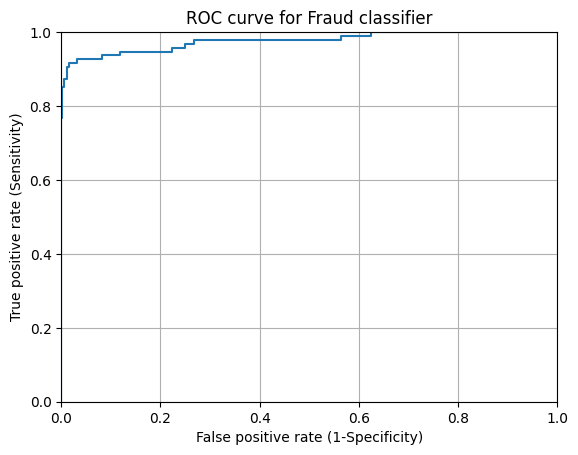

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Fraud classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob[:,1])

0.9764485970889165